<a href="https://colab.research.google.com/github/maryadriennerdrgz/CpE-AIML/blob/main/58034_Lab05_LakadMatatag.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Topic 05.1: Classification
$_{\text{©D.J. Lopez | 2021 | Fundamentals of Machine Learning}}$

Another vital activity of Machine Learning is Classification. In this module we are going to understand the concepts and applications of classification in machine learning. In this module, we are going to discuss:
* Linear Classification
* Logistic Regression

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Part 1: Creating a Dataset
In Classification activities datasets should again include features and targets. The difference of the targets for classification from regression is that they are now categorical.A classification activity can either be working on a single class or multiple classes. Classification activities that are only categorizing single classes uses **Binary Classification** while those having multiple classes uses **Categorical Classification** or **Multi-class Classification**.

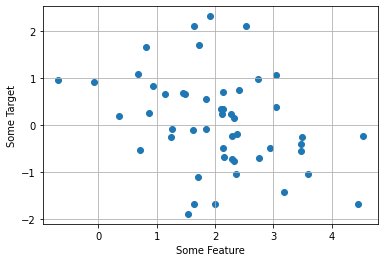

In [ ]:
### In thise example we will be creating a dummy dataset for a binary classifier

N = 100 ## total number of datapoints
cov = -0.30 ## covariance of X and y
center1 = np.array([2, 0]).T ## midpoint of the gaussian distribution
cov_mat1 = np.array([
                    [1,cov],
                    [cov,1]
])
np.random.seed(0)
dataset = np.array(np.random.multivariate_normal(center1,cov_mat1,int(N/2)))
## create a single two-variable gaussian distribution

plt.scatter(dataset[:,0],dataset[:,1])
plt.ylabel("Some Target")
plt.xlabel("Some Feature")
plt.grid()
plt.show()


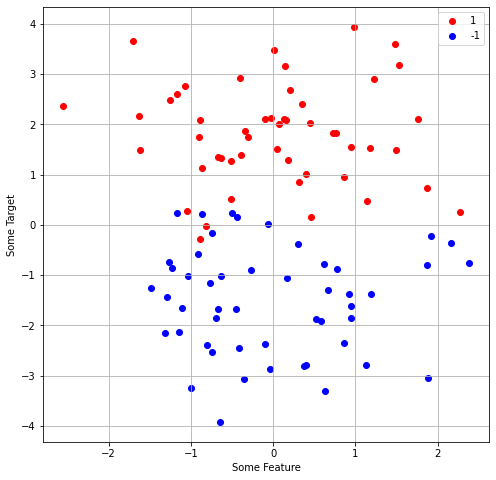

In [ ]:
## Now lets try to create two different distributions
## let's assume that each gaussian distribution is a class of its own
N = 100
cov = 0
center1 = np.array([0, 1.7]).T
cov_mat1 = np.array([
                    [1,cov],
                    [cov,1]
])

center2 = np.array([0, -1.7]).T
cov_mat2 = np.array([
                    [1,cov],
                    [cov,1]
])

np.random.seed(0)
X1 = np.array(np.random.multivariate_normal(center1,cov_mat1,int(N/2)))
X2 = np.array(np.random.multivariate_normal(center2,cov_mat2,int(N/2)))
## We'll declare another gaussian distribution with a different mean

plt.figure(figsize=(8,8))
plt.scatter(X1[:,0],X1[:,1], c='r', label='1')
plt.scatter(X2[:,0],X2[:,1], c='b', label='0')
plt.ylabel("Some Target")
plt.xlabel("Some Feature")
plt.legend()
plt.grid()
plt.show()

In [ ]:
### Label the datasets programmatically
X1 = np.append(X1,np.ones((X1.shape[0],1)),axis=1)
X2 = np.append(X2,np.zeros((X2.shape[0],1)),axis=1)

### Combine to a single dataset
X_train = np.vstack((X1,X2))
np.random.shuffle(X_train)

In [ ]:
def visualize(X):
  plt.figure(figsize=(8,8))
  color = ['red','blue']
  plt.scatter(X[:,0], X[:,1],c=X[:,2], cmap='jet')
  plt.xlabel('Feature')
  plt.ylabel('Target')

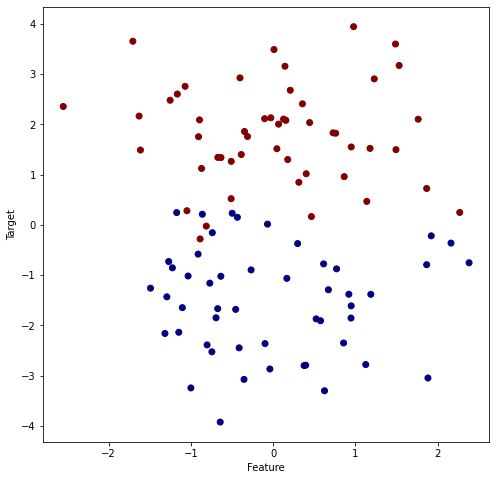

In [ ]:
visualize(X_train)

In [ ]:
### Creating a Binary Linear Classifier using Least Squares

## Set the data for the dataset
X = X_train[:,0:2]
X = np.hstack((X,np.ones((X_train.shape[0], 1))))
y = X_train[:,2].reshape(-1,1)

## Compute for the weights
pseudo_inv = np.linalg.inv(X.T @ X)
weights = pseudo_inv @ (X.T @ y)
weights

array([[0.00739642],
       [0.2192233 ],
       [0.46870667]])

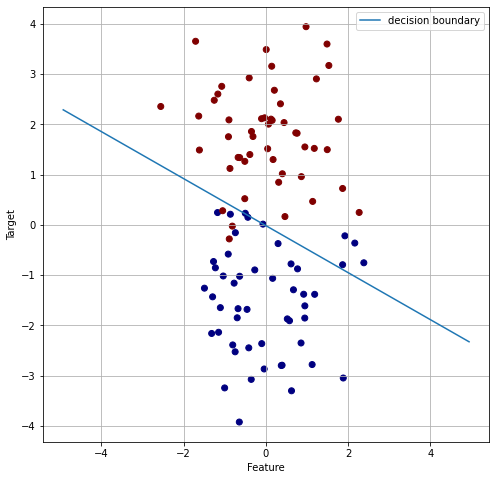

In [ ]:
## Visualize
def class_plot(X, y, weights):
  plt.figure(figsize=(8,8))

  xmin, xmax = X[:,1].min()-1, X[:,1].max()+1
  xaxis = np.linspace(xmin,xmax)
  yaxis = -weights[0]/weights[-1] - (weights[1]/weights[-1])*xaxis

  plt.scatter(X[:,0], X[:,1],c=y, cmap='jet')
  plt.plot(xaxis,yaxis, label='decision boundary') 

  plt.legend()
  plt.grid()
  plt.xlabel('Feature')
  plt.ylabel('Target')
  plt.show()  

class_plot(X,y,weights)

In [ ]:
## Create an inference instance to make predictions
infer = lambda X : np.round(X@weights)
X_test = np.array([0,2,1]) 
infer(X_test)

array([1.])

# Part 2: Metrics
Just like any machine learning activity we need to determine its measures of robustness and success. In this section we will be identifying the error and explainability of models. We will be implementing `sklearn` for determining the necessary metrics.

In [ ]:
from sklearn import metrics

## 2.1 Error
Just like in regression, we measure the robustness of a machine learning model. The most common loss function in classification by getting its vector norm. We generally formulate the vector norm as:
$$J = ((y-\hat{y})^N)^{-\frac{1}{N}}$$
Whereas $E$ is the norm or the cost of the model, $y$ is the targets, $\hat{y}$ are the predictions, and $N$ is the dimension of the distance. The most common norm is the Euclidean norm having $N=2$.

In [ ]:
### L2 Error
preds = infer(X)
residuals = y - preds
l2_error = np.sqrt(np.sum(np.square(residuals)))
l2_error

2.23606797749979

## 2.2 Explainability
Classification will use a different approach for determining the explainability since we are dealing with categorical predictions rather than continuous. Here we use:
* Accuracy
* Precision
* Recall
* F1-Score

In [ ]:
### Accuracy
accuracy = 1-np.mean(np.abs(residuals))
accuracy

0.95

In [ ]:
metrics.accuracy_score(y,preds)

0.95

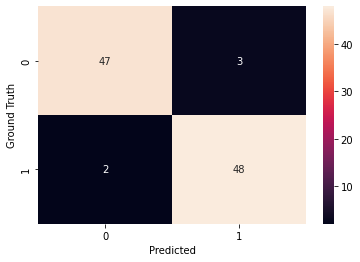

In [ ]:
### Confusion Matrix

conf_mat = confusion_matrix(y, preds)
sns.heatmap(conf_mat, annot=True)
plt.xlabel("Predicted")
plt.ylabel("Ground Truth")
plt.show()

In [ ]:
conf_mat

array([[47,  3],
       [ 2, 48]])

In [ ]:
true_neg = conf_mat[0,0]
false_pos = conf_mat[0,1]
false_neg = conf_mat[1,0]
true_neg = conf_mat[1,1]

In [ ]:
## Precision
precision = true_pos/(true_pos+false_pos)
precision

0.94

In [ ]:
metrics.precision_score(y, preds)

0.9411764705882353

In [ ]:
## Recall
recall = true_pos/(true_pos+false_neg)
recall

0.9591836734693877

In [ ]:
metrics.recall_score(y,preds)

0.96

In [ ]:
## F1-Score
F1 = 2*(precision*recall)/(precision+recall)
F1

0.9494949494949495

In [ ]:
metrics.f1_score(y,preds)

0.9504950495049505

# Part 3: Logistic Regression
Logistic regression determines a relationship between predictor variables and a categorical target. Logistic regression can be used mainly in classification problems in machine learning where it determines the probability of an input being inclusive of a certain class or category. Logistic regression is mainly used in binary classification but it can be extended in multiple category classfication.

In [ ]:
import pandas as pd
from sklearn.linear_model import LogisticRegression

In [ ]:
df_admit = pd.read_csv('/content/admitance-sats.csv')
df_admit.head(5)

,SAT,Admitted
0,1363,0
1,1792,1
2,1954,1
3,1653,0
4,1593,0


In [ ]:
X = df_admit['SAT'].to_numpy().reshape((-1,1))
y = df_admit['Admitted'].to_numpy().reshape((-1,1))

In [ ]:
log_model = LogisticRegression(random_state=0)
log_model.fit(X,y)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
preds = log_model.predict(X)

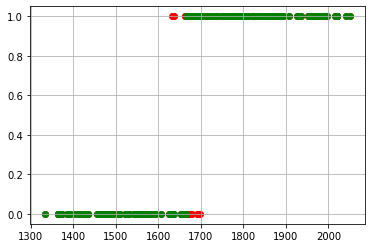

In [ ]:
plt.scatter(X,y, color='red')
plt.scatter(X,preds, color='green')
plt.grid()

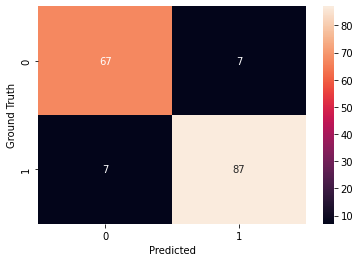

In [ ]:
conf_mat = metrics.confusion_matrix(y, preds)
sns.heatmap(conf_mat, annot=True)
plt.xlabel("Predicted")
plt.ylabel("Ground Truth")
plt.show()

In [ ]:
class_metrics = {
    'accuracy': [metrics.accuracy_score(y, preds)],
    'precision': [metrics.precision_score(y, preds)],
    'recall': [metrics.recall_score(y,preds)],
    'f1-score': [metrics.f1_score(y, preds)]
}
pd.DataFrame(class_metrics)

,accuracy,precision,recall,f1-score
0,0.916667,0.925532,0.925532,0.925532


## Laboratory Activity
1. For the laboratory activity, obtain a dataset of your liking from a data source. Explain the purpose of the dataset and mention any publication if it is obtained from the source. Provide a needs statement and significance for the dataset.

2. Identify an algorithm or method in performing a single variable classification using least squares or logistic regression. 

3. Present your solution implementing your algorithm of choice. You may use any library or package in this section. However, you are required to observe the following:

>* Enforce object-oriented programming by implementing at least two of the pillars of OOP in the entirety of the solution.
* Dedicated functions for training, predicting, and evaluating the solution.
* A DataFrame of the metrics of the solution
* A visualization of the solution’s results.


1. Car Price Prediction is the dataset we selected. The goal of this data set is for management to understand how prices vary in relation to the independent variables. They can then manipulate the design of the cars, the business strategy, and so on to meet certain price points. They will predict the prices of used cars. They will be developing a variety of Machine Learning and Deep Learning models using various architectures. Finally, they will compare the performance of machine learning models to deep learning models.



2. One algorithm that can perform a single variable classification is Multiple Logistic Regression. Multiple Logistic Regression is used to predict a variable using other variables. It can be used when there is a nominal variable and two or more measurement variables. A dependent variable (Y) stands as the nominal variable and a variable (X) influences the likelihood of getting a specific value for the variable (Y). The equation that best predicts the value of the Y variable for the values of the X variables is also found using multiple logistic regression. Assumptions also are needed to a data for getting an accurate output. a single variable classification can be performed using this when you are predicting a Binary Dependent Variable. In this case, You'll need a binary variable to predict. Two outcome categories are expected for getting  the outcome of the interest. One good application of this is in Education. When you want to predict the course status of a student based on his/her studying effort and his/her current grade. 

TRYYY



Dedicated functions for training, predicting, and evaluating the solution.

In [ ]:
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd 
import seaborn as sns 
from sklearn import metrics 
from sklearn.linear_model import LogisticRegression

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/maryadriennerdrgz/CpE-AIML/main/Data/CarPrice_Assignment.csv')
df

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,188.8,68.9,55.5,2952,ohc,four,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,188.8,68.8,55.5,3049,ohc,four,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,188.8,68.9,55.5,3012,ohcv,six,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,188.8,68.9,55.5,3217,ohc,six,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


In [ ]:
class LRegression():
  def train(self,X,y):
    if len(X.shape) == 1: X = self._reshape_x(X)
    X = self._concatenate_ones(X)
    self.coefficients = np.linalg.inv(X.transpose().dot(X)).dot(X.transpose()).dot(y)

  def predict(self):
    log_model = LogisticRegression(random_state=0)
    log_model.fit(X,y)
    predicts = log_model.predict(X)
    return predicts
  
  def evaluate(self,X,y):
    class_metrics = {
    'accuracy': [metrics.accuracy_score(y,predicts)],
    'precision': [metrics.precision_score(y,predicts)],
    'recall': [metrics.recall_score(y,predicts)],
    'f1-score': [metrics.f1_score(y,predicts)]}
    dataf = pd.DataFrame(class_metrics)
    return dataf

  def visualize(self,X,y):
    log_model = LogisticRegression(random_state=0)
    log_model.fit(X,y)
    predicts = log_model.predict(X)
    plt.figure()
    plt.scatter(X,y, color='red')
    plt.scatter(X,predicts, color='green')
    plt.grid()
    plt.figure()
    conf_mat = metrics.confusion_matrix(y,predicts)
    sns.heatmap(conf_mat, annot=True)
    plt.xlabel("Predicted")
    plt.ylabel("Ground Truth")
    return plt.show()

  def __init__(self):
    self.model_ = self.train(X,y)
  
  def _reshape_x(self,X):
    return X.reshape(-1,1)

  def _concatenate_ones(self,X):
    ones = np.ones(shape = X.shape[0]).reshape(-1,1)
    return np.concatenate((ones,X),1)

In [ ]:
car = pd.read_csv('https://raw.githubusercontent.com/maryadriennerdrgz/CpE-AIML/main/Data/CarPrice_Assignment.csv').head(100)
X = car['horsepower'].to_numpy().reshape((-1,1))
y = car['peakrpm'].to_numpy().reshape((-1,1))

In [ ]:
regressor = LRegression()

In [ ]:
regressor.predict()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


array([5000, 5000, 5000, 5500, 5000, 5000, 5000, 5000, 5000, 5000, 5500,
       5500, 5000, 5000, 5000, 5000, 5000, 5000, 5200, 5500, 5500, 5500,
       5500, 5500, 5500, 5500, 5500, 5500, 5500, 5000, 5200, 5500, 5200,
       5500, 5500, 5500, 5500, 5500, 5500, 5500, 5500, 5500, 5500, 5500,
       5500, 5500, 5500, 5000, 5000, 4750, 5500, 5500, 5500, 5500, 5500,
       5500, 5500, 5500, 5000, 5500, 5500, 5500, 5500, 5200, 5500, 5000,
       5500, 5000, 5000, 5000, 5000, 5000, 5000, 5000, 5000, 5000, 5500,
       5500, 5500, 5500, 5000, 5500, 5000, 5000, 5000, 5500, 5500, 5000,
       5000, 5500, 5200, 5500, 5500, 5500, 5500, 5500, 5500, 5500, 5500,
       5500])

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


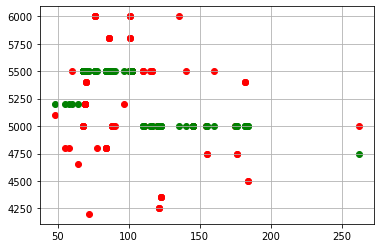

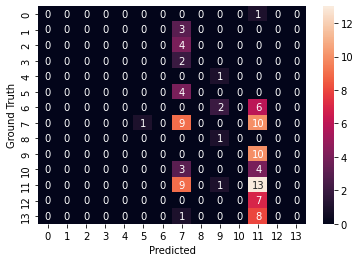

In [ ]:
regressor.visualize(X,y)

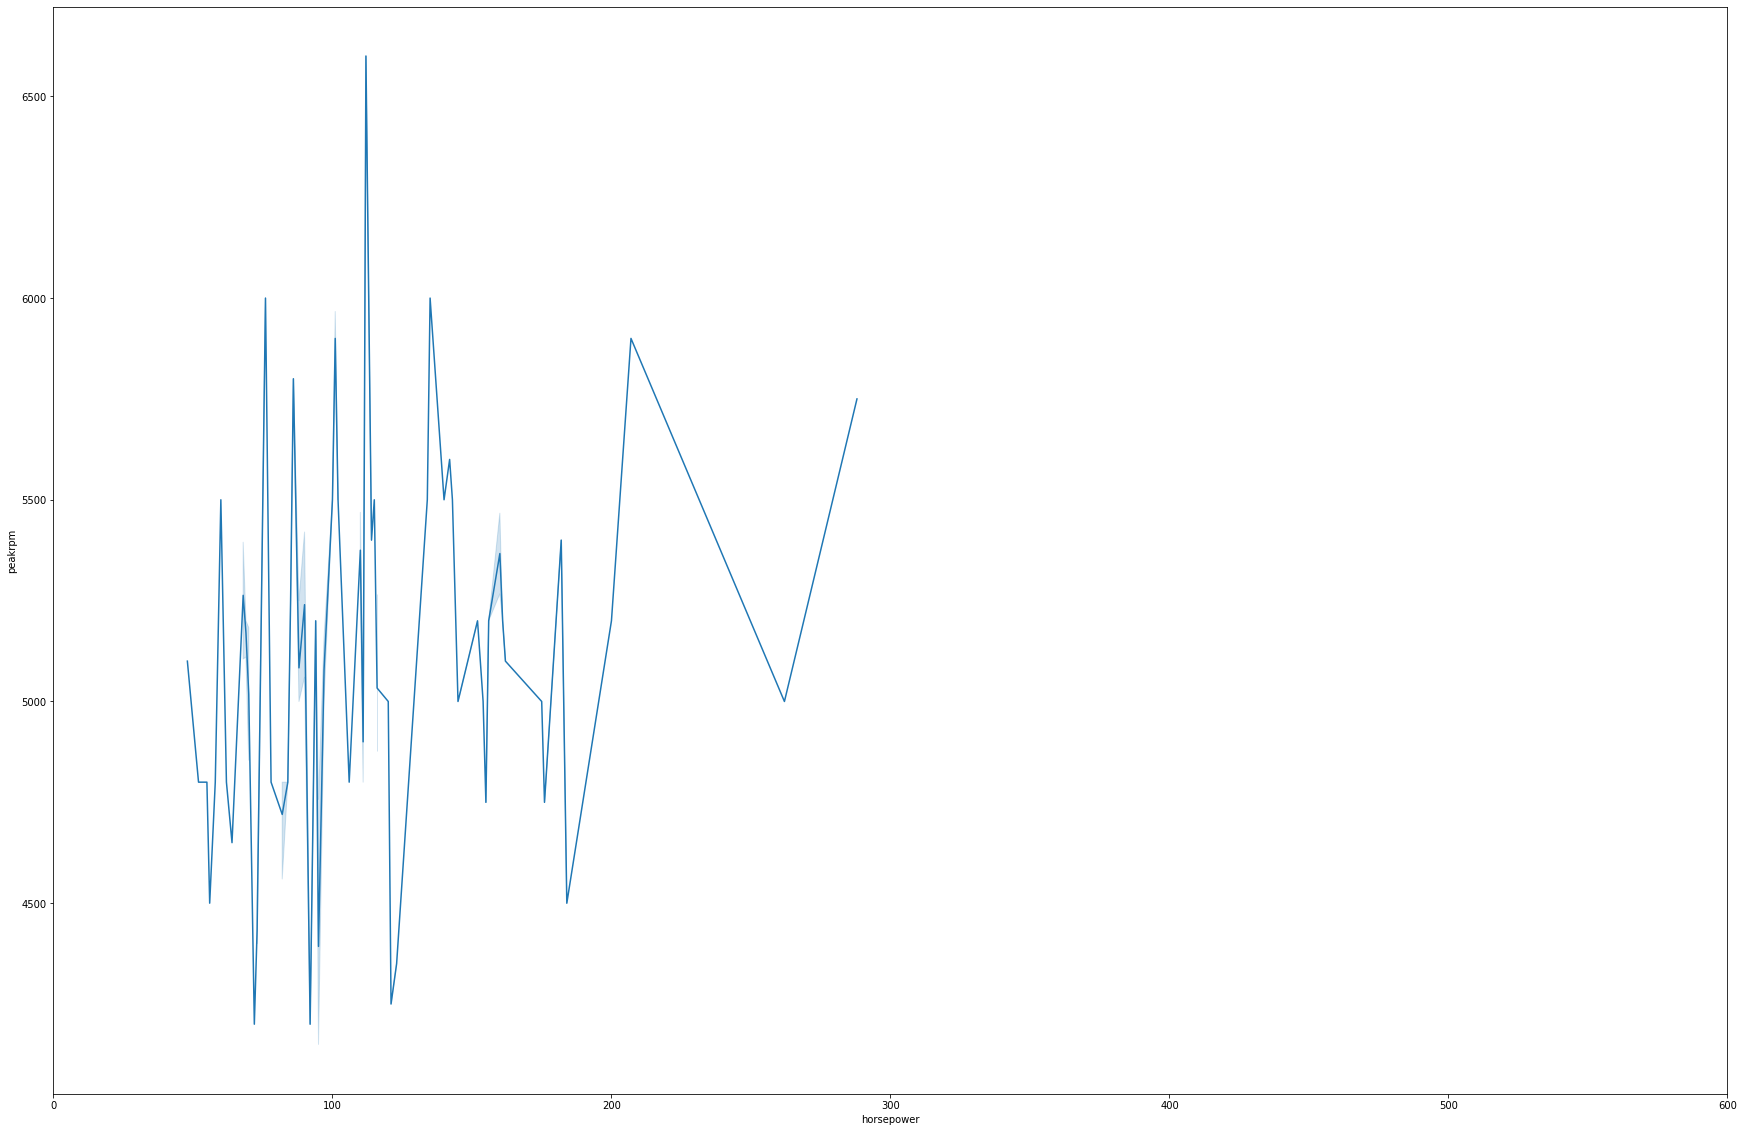

In [ ]:
#Visualization
plt.figure(figsize=(30,20))
plt.xlim({0,600})
sns.lineplot(data=df, x='horsepower', y='peakrpm')

REFERENCES

[1] Shalini Goyal “Car Price Prediction (Linear Regression - RFE),” Kaggle, 2018. [Online]. Available: https://www.kaggle.com/mathurinache/covid19-mortality-by-vaccination-status. [Accessed: 08-Dec-2021].